# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
count    129780.000000
mean        376.585253
std          67.

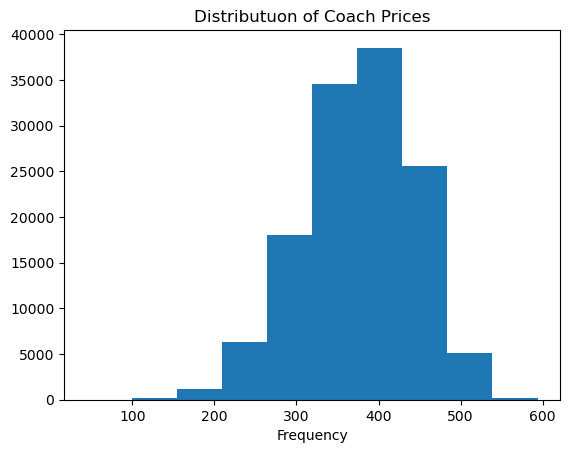

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
print(flight.coach_price.describe()) #using the describe function to pull summary statistics of the coach prices

#The mean coach price is 376 and a median of 380, with a low of 44.4 and a hgih of 593.6. A coach price of 500 is within the top 25% of coach prices with the upper quartile being 426.

plt.hist(flight.coach_price)
plt.xlabel("Average Coach Price")
plt.xlabel("Frequency")
plt.title("Distributuon of Coach Prices")
plt.show()
plt.clf()


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64


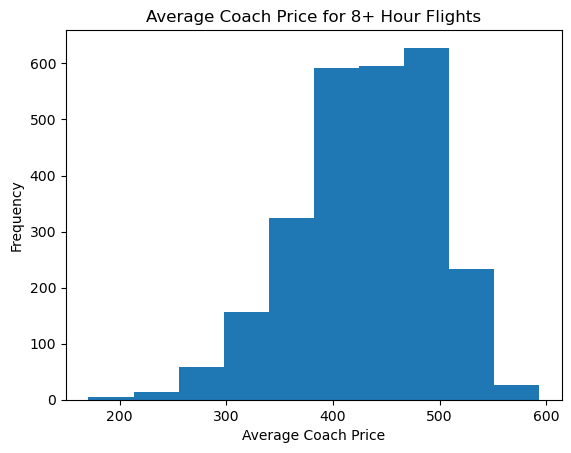

<Figure size 640x480 with 0 Axes>

In [15]:
## Task 2
flight_8_hours = flight[flight.hours >= 8] #limiting the flights to 8+ hour flights
print(flight_8_hours.coach_price.describe()) #using the describe function to find summary statistics of the coach price column

#Limiting to 8 hour flights only, the mean price is 431 and the median 437. A 500 dollar ticket would still be within the top 25% of price
#however not as far above the upper quartile as before (UQ of 480).

plt.hist(flight_8_hours.coach_price)
plt.xlabel("Average Coach Price")
plt.ylabel("Frequency")
plt.title("Average Coach Price for 8+ Hour Flights")
plt.show()
plt.clf()


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

count    129680.000000
mean         12.018530
std           7.793645
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max          58.000000
Name: delay, dtype: float64


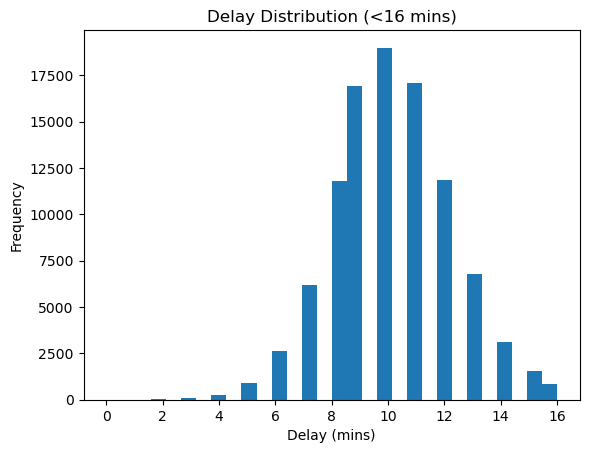

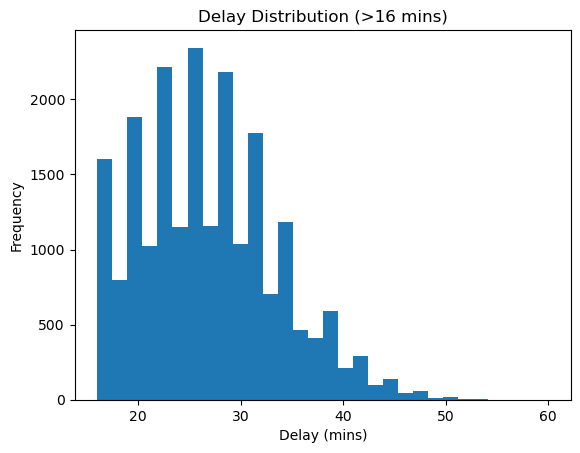

<Figure size 640x480 with 0 Axes>

In [19]:
## Task 3
print(flight.delay[flight.delay < 1000].describe()) #noticing a delay in the data of 1560 mins, limiting to below 1000 shows a max delay of 58 mins.
#the median delay is 10 mins with 75% of flights having a delay of 13 mins or less.
plt.hist(flight.delay[flight.delay > 0], bins = 30, range=(0, 16))
plt.xlabel("Delay (mins)")
plt.ylabel("Frequency")
plt.title("Delay Distribution (<16 mins)")
plt.show()
plt.clf()

#There appears to be two sets of delay times. Most delays are below 16 mins, with a smaller group being between 16 and 58 mins.
#The most frequent delay is 10 mins with over 18000 flights having this delay.

plt.hist(flight.delay[flight.delay > 0], bins = 30, range=(16,60))
plt.xlabel("Delay (mins)")
plt.ylabel("Frequency")
plt.title("Delay Distribution (>16 mins)")
plt.show()
plt.clf()

#in the second plot, the delay is around 26 mins, with over 2000 flights having this delay.

#The delays appear broadly normally distributed.


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

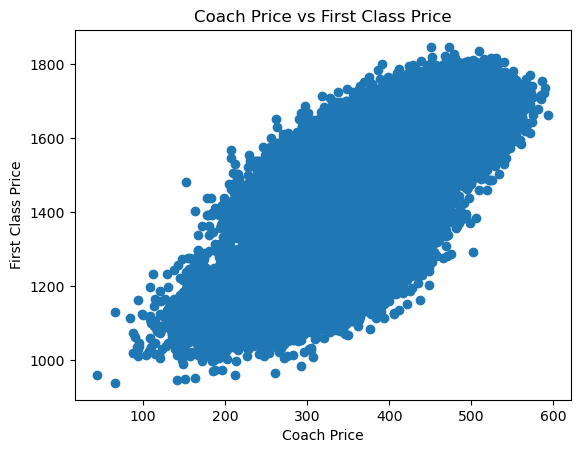

<Figure size 640x480 with 0 Axes>

In [21]:
## Task 4
plt.scatter(x = flight.coach_price, y = flight.firstclass_price)
plt.xlabel("Coach Price")
plt.ylabel("First Class Price")
plt.title("Coach Price vs First Class Price")
plt.show()
plt.clf()

#plotting a scatter plot of the dats shows that there is a broadly postive correlation between coach price and first class price.
#implying that the more expensive the coach price, the more expensive the first class price


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

Intercept               370.786286
inflight_meal[T.Yes]     19.313521
dtype: float64


C:\Users\Ben\AppData\Local\Temp\ipykernel_14732\3698596049.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = [results1.params[0] + results1.params[1]*x for x in x1]


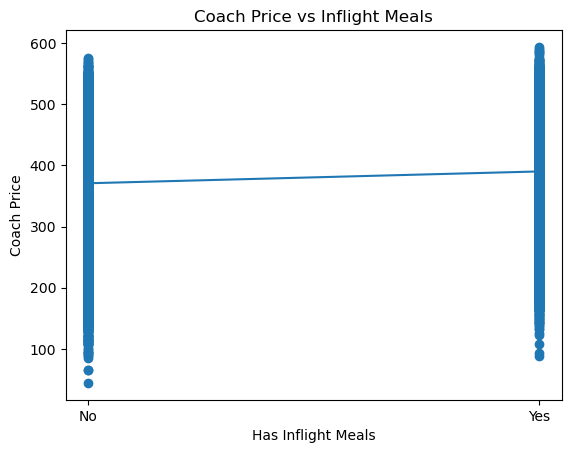

Intercept                        320.422995
inflight_entertainment[T.Yes]     70.065155
dtype: float64


C:\Users\Ben\AppData\Local\Temp\ipykernel_14732\3698596049.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y2 = [results2.params[0] - results2.params[1]*x for x in x1]


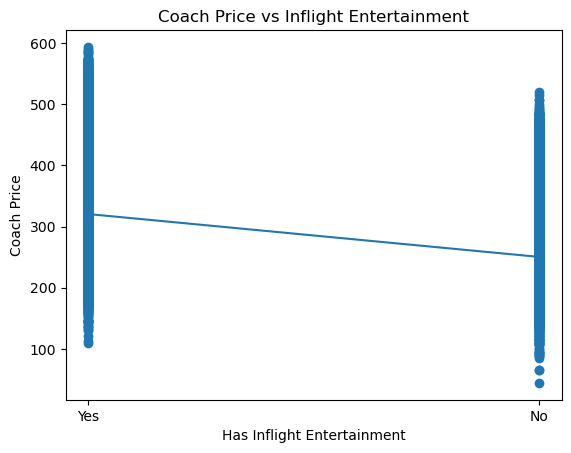

Intercept               313.185626
inflight_wifi[T.Yes]     70.465749
dtype: float64


C:\Users\Ben\AppData\Local\Temp\ipykernel_14732\3698596049.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y3 = [results3.params[0] - results3.params[1]*x for x in x1]


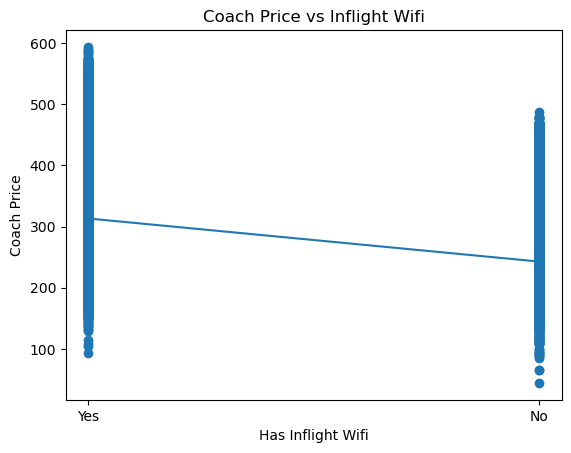

<Figure size 640x480 with 0 Axes>

In [27]:
## Task 5
plt.scatter(x = flight.inflight_meal, y = flight.coach_price)
model1 = sm.OLS.from_formula("coach_price ~ inflight_meal", data = flight)
results1 = model1.fit()
print(results1.params)
x1 = [0, 1]
y1 = [results1.params[0] + results1.params[1]*x for x in x1]
plt.xlabel("Has Inflight Meals")
plt.ylabel("Coach Price")
plt.title("Coach Price vs Inflight Meals")
plt.plot(x1,y1) 
plt.show()
plt.clf()

plt.scatter(x = flight.inflight_entertainment, y = flight.coach_price)
model2 = sm.OLS.from_formula("coach_price ~ inflight_entertainment", data = flight)
results2 = model2.fit()
print(results2.params)
y2 = [results2.params[0] - results2.params[1]*x for x in x1]
plt.xlabel("Has Inflight Entertainment")
plt.ylabel("Coach Price")
plt.title("Coach Price vs Inflight Entertainment")
plt.plot(x1, y2)
plt.show()
plt.clf()

plt.scatter(x = flight.inflight_wifi, y = flight.coach_price)
model3 = sm.OLS.from_formula("coach_price ~ inflight_wifi", data = flight)
results3 = model3.fit()
print(results3.params)
y3 = [results3.params[0] - results3.params[1]*x for x in x1]
plt.xlabel("Has Inflight Wifi")
plt.ylabel("Coach Price")
plt.title("Coach Price vs Inflight Wifi")
plt.plot(x1, y3)
plt.show()
plt.clf()

#from the 3 plots we can see that having these additional features does increase the price of a coach ticket. 
#having inflight meals increases the price by around 19.3 dollars
#having inflight entertainment increases price by around 70 dollars
#having inflight wifi increases price by around 70 dollars.


6. How does the number of passengers change in relation to the length of flights?

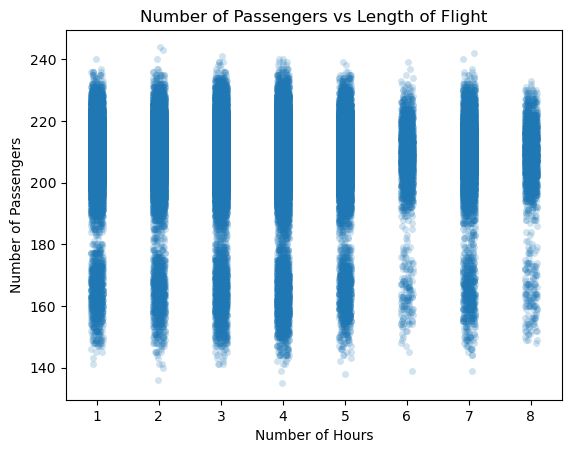

<Figure size 640x480 with 0 Axes>

In [29]:
## Task 6
sns.stripplot(x = "hours", y = "passengers", data = flight, jitter = True, alpha = 0.2)
plt.xlabel("Number of Hours")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers vs Length of Flight")
plt.show()
plt.clf()

#looking at the plot the maximum and minimum passengers for all flights is broadly similar
#it appears that for longer haul flights, particularly for 6 and 8 hours that the number of flights with below 180 passengers is less common.
#this would make sense in the context of costs
#another note is that around 180 passengers the points are less dense for most flights indicating not many have this number.


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

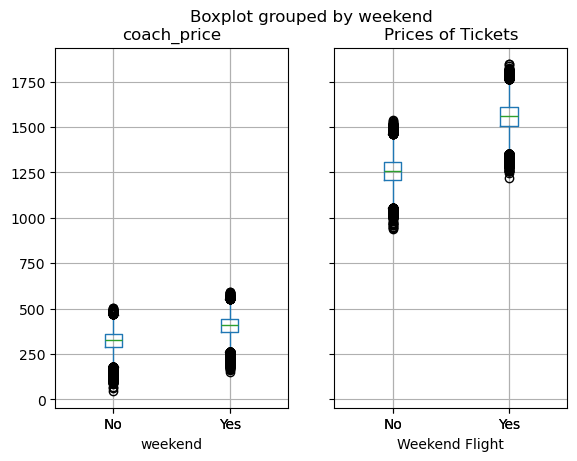

<Figure size 640x480 with 0 Axes>

In [35]:
## Task 7
# sns.stripplot(x = "coach_price", y = "firstclass_price", hue = "weekend", data = flight)
# plt.show()
# plt.clf() #plot crashed the plotter due to data volume.
flight.boxplot(column=["coach_price", "firstclass_price"], by = "weekend")
plt.xlabel("Weekend Flight")
plt.ylabel("Price")
plt.title("Prices of Tickets")
plt.show()
plt.clf()

#the plot shows that weekend prices are typically higher than weekday prices.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

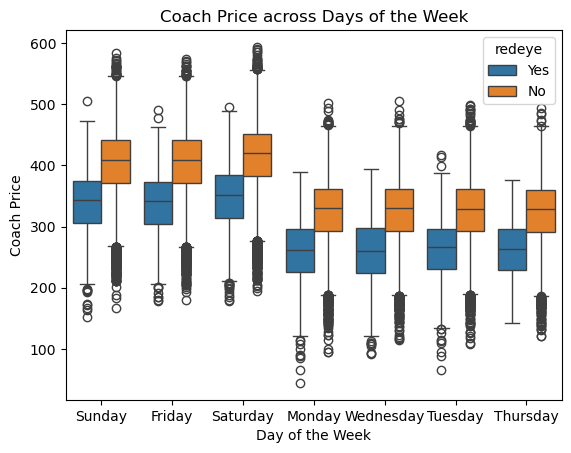

<Figure size 640x480 with 0 Axes>

In [33]:
## Task 8
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.title("Coach Price across Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Coach Price")
plt.show()
plt.clf()

#The box plots show that typically red eye flights are cheaper than non-redeye flight. Usually 75% of redeye flights are cheaper than the lower quartile of non-redeye.
#Weekend prices are typically much higher with weekend redeye flights being broadly similar to weekday nonredeye flights.
